# Lecture 1

In [2]:
def orientation(a, b, c):
    ob = (b[0]-a[0], b[1]-a[1])
    oc = (c[0]-a[0], c[1]-a[1])
    det = ob[0]*oc[1]-ob[1]*oc[0]
    return -1 if det<0 else 1 if det>0 else 0

# Lecture 2

In [3]:
# Checks if the point b its on the segment ac
def onSegment(a,b,c):
    on_x_proyection = b[0]<=max(a[0],c[0]) and b[0]>= min(a[0],c[0])
    print(f"pr_x: {on_x_proyection}")
    on_y_proyection = b[1]<=max(a[1],c[1]) and b[1]>= min(a[1],c[1])
    print(f"pr_y: {on_y_proyection}")
    if(on_x_proyection and on_y_proyection): return True
    return False

def doIntersect(a,b,c,d):
    # Orientations between segment and the other points
    oc_segment_ab = orientation(a,b,c)
    od_segment_ab = orientation(a,b,d)
    oa_segment_cd = orientation(c,d,a)
    ob_segment_cd = orientation(c,d,b)

    # Case 1
    if(oc_segment_ab != od_segment_ab and oa_segment_cd != ob_segment_cd):
        return True
    
    # Special cases
    print("Case 1")
    if(oc_segment_ab == 0 and onSegment(a,c,b)): return True
    print("Case 2")
    if(od_segment_ab == 0 and onSegment(a,d,b)): return True
    print("Case 3")
    if(oa_segment_cd == 0 and onSegment(c,a,d)): return True
    print("Case 4")
    if(ob_segment_cd == 0 and onSegment(c,b,d)): return True

    return False





# Lecture 3

In [4]:
from math import atan2

def get_convex_hull(p):
    n = len(p)
    if n<3: return
    hull = []
    s_y = min(p, key=lambda x: x[1])
    p.sort(key=lambda x: (atan2(x[1]-s_y[1], x[0]-s_y[0]), -x[1], x[0]))
    for point in p:
        while len(hull)>=2 and orientation(hull[-2], hull[-1], point) <= 0:
            hull.pop()
        hull.append(point)
    return hull

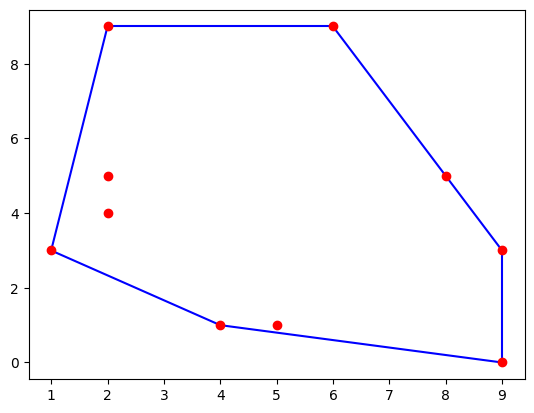

In [5]:
import matplotlib.pyplot as plt
import random as r
p = [x for x in zip([r.randint(0,10) for _ in range(10)],[r.randint(0,10) for _ in range(10)])]
hull = get_convex_hull(p)

for i in range(len(hull)):
    plt.plot([hull[i][0],hull[(i+1)%len(hull)][0]],[hull[i][1],hull[(i+1)%len(hull)][1]],'b')
for i in range(len(p)):
    plt.plot(p[i][0],p[i][1],'ro')
plt.show()

